## Results from different model architecture for face anti-spoofing using celeba-spoof dataset 

using 3 base architecture
- MobileNetV2
- InceptionV3
- ResNet50


CelebA-Spoof Dataset Reference:
- https://github.com/Davidzhangyuanhan/CelebA-Spoof

```script
@inproceedings{CelebA-Spoof,
  title={CelebA-Spoof: Large-Scale Face Anti-Spoofing Dataset with Rich Annotations},
  author={Zhang, Yuanhan and Yin, Zhenfei and Li, Yidong and Yin, Guojun and Yan, Junjie and Shao, Jing and Liu, Ziwei},
  booktitle={European Conference on Computer Vision (ECCV)},
  year={2020}
}
```

In [1]:
# import library
# basic library
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

C:\Users\Roy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Roy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Roy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# tensorflow library
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.4.1
Hub version:  0.9.0
GPU is available


In [3]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

## Test Dataset

In [4]:
data_path = 'e:/skripsi/face-anti-spoof-celeba-spoof/dataset-crop/'
TEST_DIR = data_path + 'test/'

testing_real_dir = os.path.join(TEST_DIR, 'real')
testing_spoof_dir = os.path.join(TEST_DIR, 'spoof') 

live_test = os.listdir(testing_real_dir)
spoof_test = os.listdir(testing_spoof_dir)

In [5]:
print('total testing real images :', len(os.listdir(testing_real_dir)))
print('total testing spoof images :', len(os.listdir(testing_spoof_dir)))

total testing real images : 3500
total testing spoof images : 6500


In [6]:
BATCH_SIZE = 32 
IMG_SHAPE = (224, 224, 3)
RANDOM_STATE = 42

In [7]:
model_mobilenetv2 = 'models/MobileNetV2.h5'
model_inceptionv3 = 'models/InceptionV3.h5'
model_resnet50 = 'models/ResNet50.h5'

In [8]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SHAPE[:-1],
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 10000 images belonging to 2 classes.


In [9]:
print(test_generator.class_indices)

class_names = ['real', 'spoof']

{'real': 0, 'spoof': 1}


## Load Sample Images

In [10]:
import cv2


def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

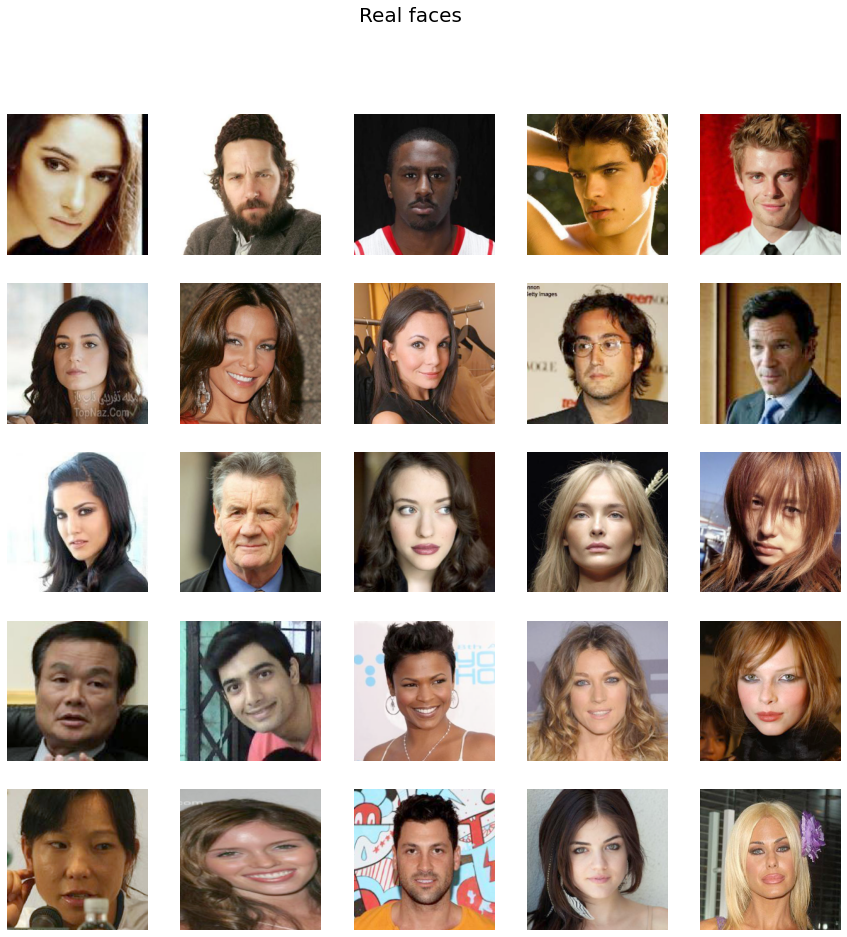

In [11]:
fig = plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(testing_real_dir + "/" + live_test[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.axis('off')

plt.show()

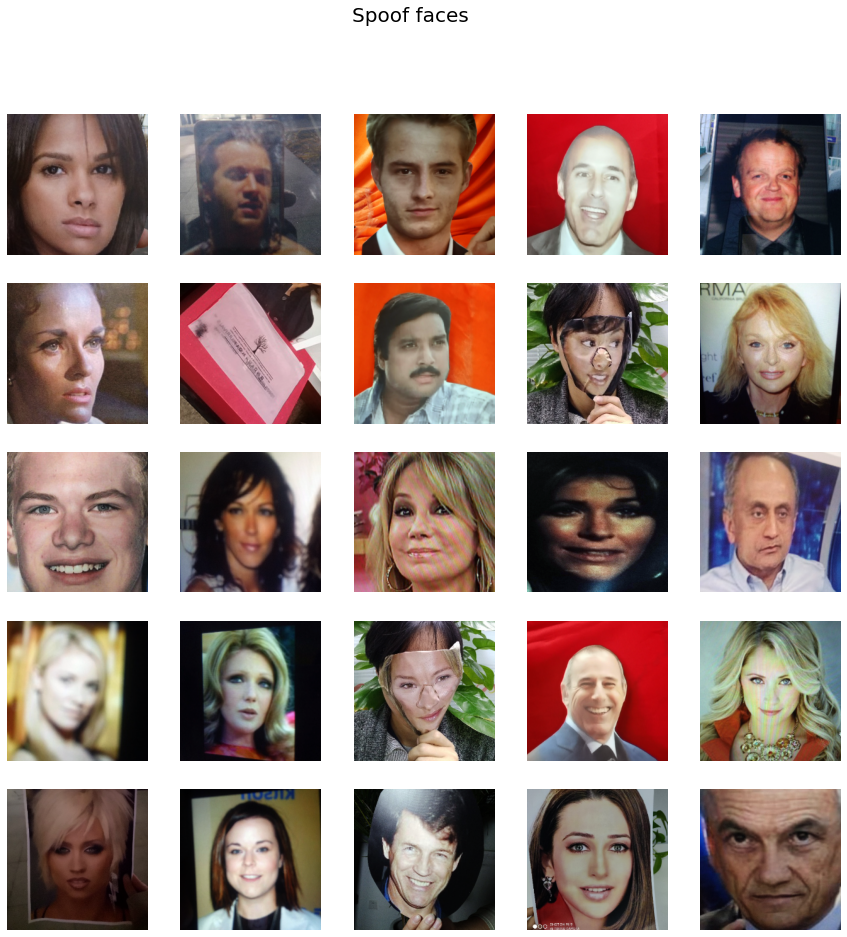

In [12]:
fig = plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(testing_spoof_dir + "/" + spoof_test[i]), cmap='gray')
    plt.suptitle("Spoof faces",fontsize=20)
    plt.axis('off')

plt.show()

## Load The Model

Load three different architecture models that has been trained before

### MobileNetV2

In [13]:
MobileNetV2 = tf.keras.models.load_model(model_mobilenetv2)
MobileNetV2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### InceptionV3

In [14]:
InceptionV3 = tf.keras.models.load_model(model_inceptionv3)
InceptionV3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
batch_normalization_94 (Batc (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### ResNet50

In [15]:
ResNet50 = tf.keras.models.load_model(model_resnet50)
ResNet50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Testing Results

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [17]:
models = [MobileNetV2, InceptionV3, ResNet50]
model_names = ['MobileNetV2', 'InceptionV3', 'ResNet50'] 

In [18]:
import time

def evaluate(models, generator, names):
    results = pd.DataFrame(columns=['accuracy', 'f1-score', 'precision', 'predict_time'])
    
    for model, name in zip(models, names):
        print('Model: {}'.format(name))
        start = time.time()
        pred = model.predict(generator, verbose=1)
        predict_time = time.time() - start

        y_test = generator.classes
        y_pred = pred.argmax(axis=1)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        results.loc[name, :] = [accuracy, f1, precision, predict_time]
    
    return results

### Results 1

In [25]:
# clear backend session
tf.keras.backend.clear_session()

In [26]:
results_1 = evaluate(models, test_generator, model_names)

Model: MobileNetV2
313/313 [==============================] - 114s 365ms/step
Model: InceptionV3
313/313 [==============================] - 115s 367ms/step
Model: ResNet50
313/313 [==============================] - 115s 367ms/step


In [27]:
results_1

accuracy  f1-score precision predict_time
MobileNetV2   0.8952  0.912316         1      114.753
InceptionV3   0.8332  0.852832  0.999793      115.404
ResNet50      0.8376  0.857293   0.99959      115.405

<AxesSubplot:>

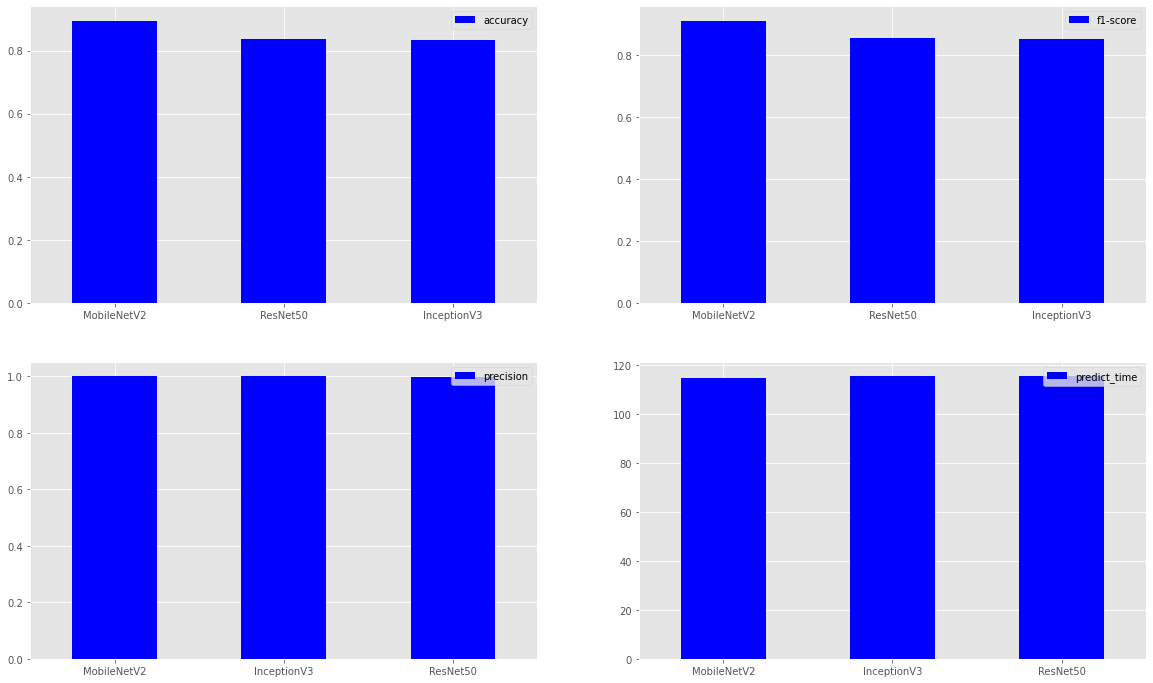

In [28]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(20,12))

results_1.sort_values('accuracy', ascending=False).plot.bar(y='accuracy', color='b', ax=ax[0][0], rot=0)
results_1.sort_values('f1-score', ascending=False).plot.bar(y='f1-score', color='b', ax=ax[0][1], rot=0)
results_1.sort_values('precision', ascending=False).plot.bar(y='precision', color='b', ax=ax[1][0], rot=0)
results_1.sort_values('predict_time', ascending=True).plot.bar(y='predict_time', color='b', ax=ax[1][1], rot=0)

### Results 2

In [29]:
# clear backend session
tf.keras.backend.clear_session()

In [30]:
results_2 = evaluate(models, test_generator, model_names)

Model: MobileNetV2
313/313 [==============================] - 106s 340ms/step
Model: InceptionV3
313/313 [==============================] - 109s 348ms/step
Model: ResNet50
313/313 [==============================] - 107s 341ms/step


In [31]:
results_2

accuracy  f1-score precision predict_time
MobileNetV2   0.8952  0.912316         1      106.688
InceptionV3   0.8332  0.852832  0.999793      109.312
ResNet50      0.8376  0.857293   0.99959      106.999

<AxesSubplot:>

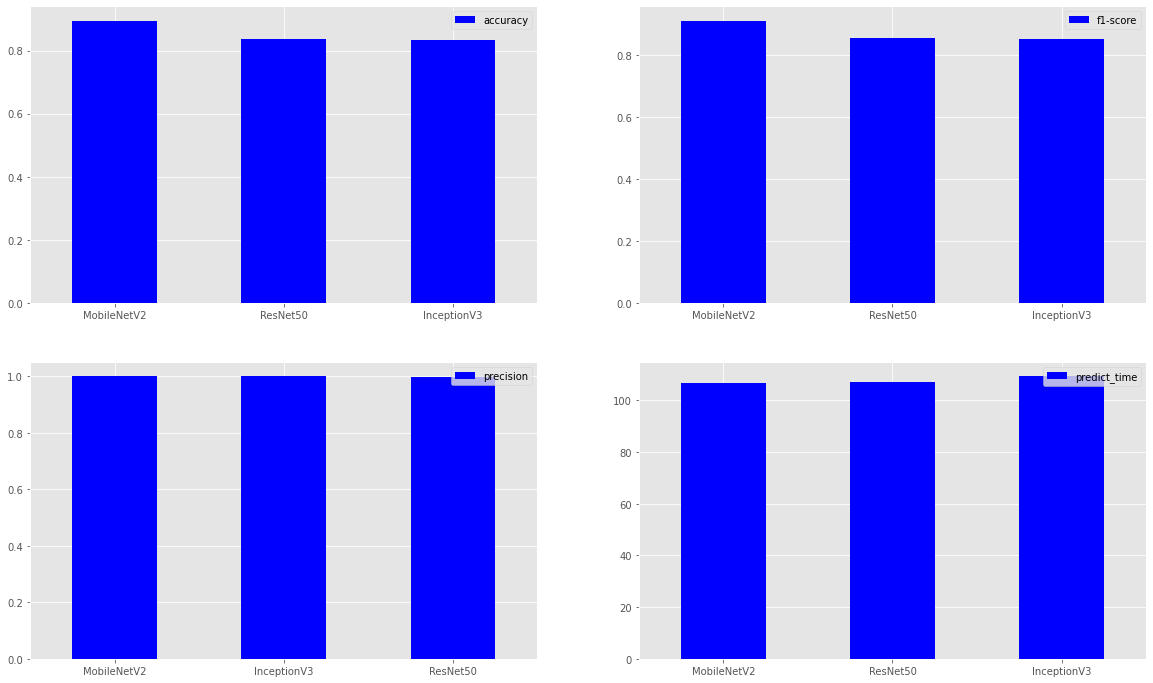

In [32]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(20,12))

results_2.sort_values('accuracy', ascending=False).plot.bar(y='accuracy', color='b', ax=ax[0][0], rot=0)
results_2.sort_values('f1-score', ascending=False).plot.bar(y='f1-score', color='b', ax=ax[0][1], rot=0)
results_2.sort_values('precision', ascending=False).plot.bar(y='precision', color='b', ax=ax[1][0], rot=0)
results_2.sort_values('predict_time', ascending=True).plot.bar(y='predict_time', color='b', ax=ax[1][1], rot=0)

### Results 3

In [33]:
# clear backend session
tf.keras.backend.clear_session()

In [34]:
results_3 = evaluate(models, test_generator, model_names)

Model: MobileNetV2
313/313 [==============================] - 113s 362ms/step
Model: InceptionV3
313/313 [==============================] - 115s 368ms/step
Model: ResNet50
313/313 [==============================] - 108s 345ms/step


In [35]:
results_3

accuracy  f1-score precision predict_time
MobileNetV2   0.8952  0.912316         1      113.525
InceptionV3   0.8332  0.852832  0.999793      115.486
ResNet50      0.8376  0.857293   0.99959      108.331

<AxesSubplot:>

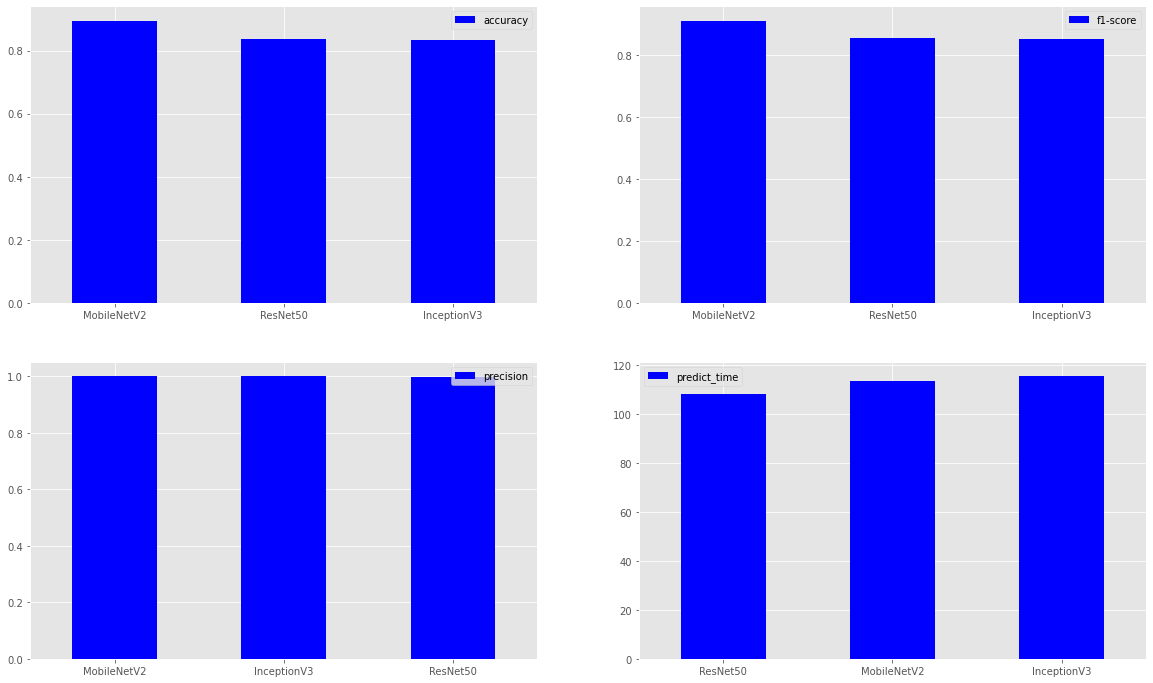

In [36]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(20,12))

results_3.sort_values('accuracy', ascending=False).plot.bar(y='accuracy', color='b', ax=ax[0][0], rot=0)
results_3.sort_values('f1-score', ascending=False).plot.bar(y='f1-score', color='b', ax=ax[0][1], rot=0)
results_3.sort_values('precision', ascending=False).plot.bar(y='precision', color='b', ax=ax[1][0], rot=0)
results_3.sort_values('predict_time', ascending=True).plot.bar(y='predict_time', color='b', ax=ax[1][1], rot=0)

## Average results time

In [37]:
avg_results = pd.DataFrame(columns=['accuracy', 'f1-score', 'precision', 'predict_time'])

In [38]:
for name in model_names:
    avg_results.loc[name, :] = [
        np.average([results_1.loc[name]['accuracy'], results_2.loc[name]['accuracy'], results_3.loc[name]['accuracy']]), 
        np.average([results_1.loc[name]['f1-score'], results_2.loc[name]['f1-score'], results_3.loc[name]['f1-score']]),
        np.average([results_1.loc[name]['precision'], results_2.loc[name]['precision'], results_3.loc[name]['precision']]),
        np.average([results_1.loc[name]['predict_time'], results_2.loc[name]['predict_time'], results_3.loc[name]['predict_time']])]

In [39]:
avg_results

accuracy  f1-score precision predict_time
MobileNetV2   0.8952  0.912316         1      111.655
InceptionV3   0.8332  0.852832  0.999793        113.4
ResNet50      0.8376  0.857293   0.99959      110.245

Text(0.5, 1.0, 'Average Predict Time')

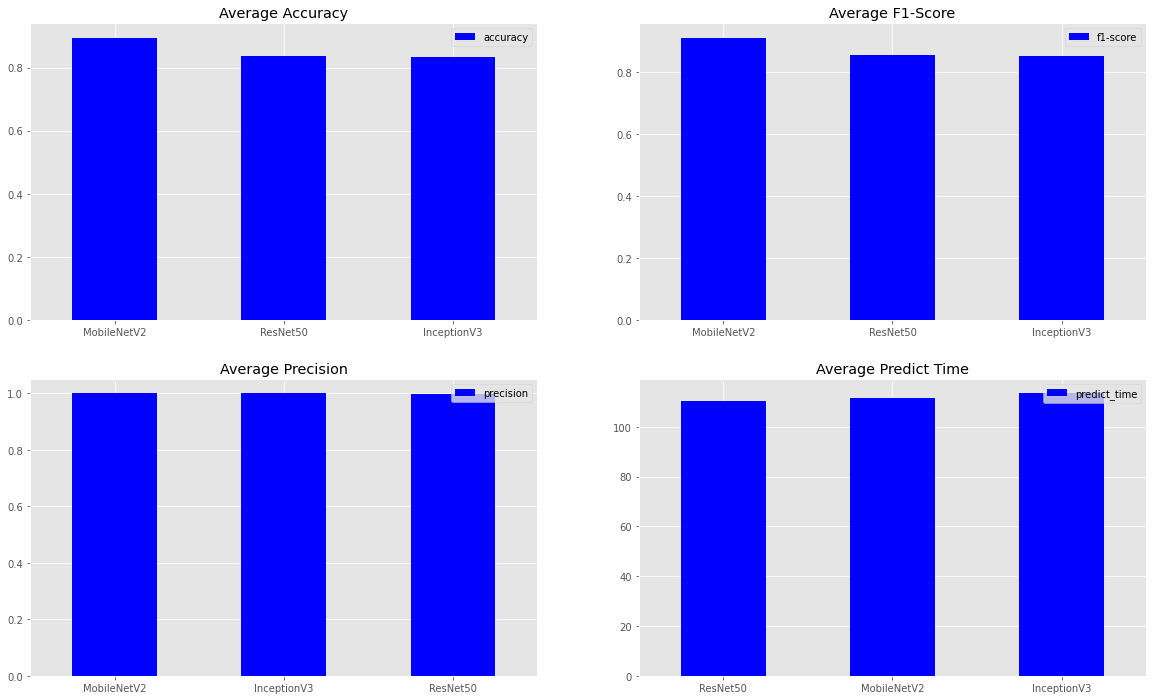

In [41]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(20,12))

avg_results.sort_values('accuracy', ascending=False).plot.bar(y='accuracy', color='b', ax=ax[0][0], rot=0)
avg_results.sort_values('f1-score', ascending=False).plot.bar(y='f1-score', color='b', ax=ax[0][1], rot=0)
avg_results.sort_values('precision', ascending=False).plot.bar(y='precision', color='b', ax=ax[1][0], rot=0)
avg_results.sort_values('predict_time', ascending=True).plot.bar(y='predict_time', color='b', ax=ax[1][1], rot=0)

ax[0][0].set_title('Average Accuracy')
ax[0][1].set_title('Average F1-Score')
ax[1][0].set_title('Average Precision')
ax[1][1].set_title('Average Predict Time')